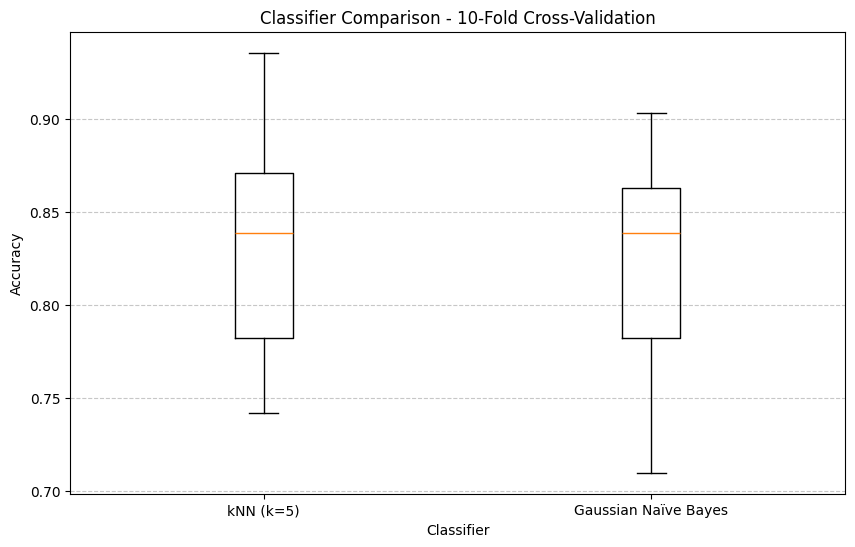

In [1]:
#1
#a)
import pandas as pd
from scipy.io.arff import loadarff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn_classifier = KNeighborsClassifier (weights="uniform", n_neighbors =5, metric="euclidean")
nb_classifier = GaussianNB ()

knn_accuracy_scores = []
nb_accuracy_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_classifier.fit(X_train, y_train)
    knn_y_pred = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_y_pred)
    knn_accuracy_scores.append(knn_accuracy)
    
    nb_classifier.fit(X_train, y_train)
    nb_y_pred = nb_classifier.predict(X_test)
    nb_accuracy = accuracy_score(y_test, nb_y_pred)
    nb_accuracy_scores.append(nb_accuracy)

plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracy_scores, nb_accuracy_scores], labels=["kNN (k=5)", "Gaussian Naïve Bayes"])
plt.title("Classifier Comparison - 10-Fold Cross-Validation")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [2]:
#b)
from scipy import stats

res = stats.ttest_rel(nb_accuracy_scores ,knn_accuracy_scores, alternative ="greater")

alpha = 0.05

if res.pvalue < alpha:
    print("Rejeitar a hipótese nula: kNN é estatisticamente superior a Naive Bayes em relação a accuracy.")
else:
    print("Falha ao rejeitar a hipótese nula:não há uma diferença significativa entre a accuracy de kNN e Naive Bayes.")

Falha ao rejeitar a hipótese nula:não há uma diferença significativa entre a accuracy de kNN e Naive Bayes.


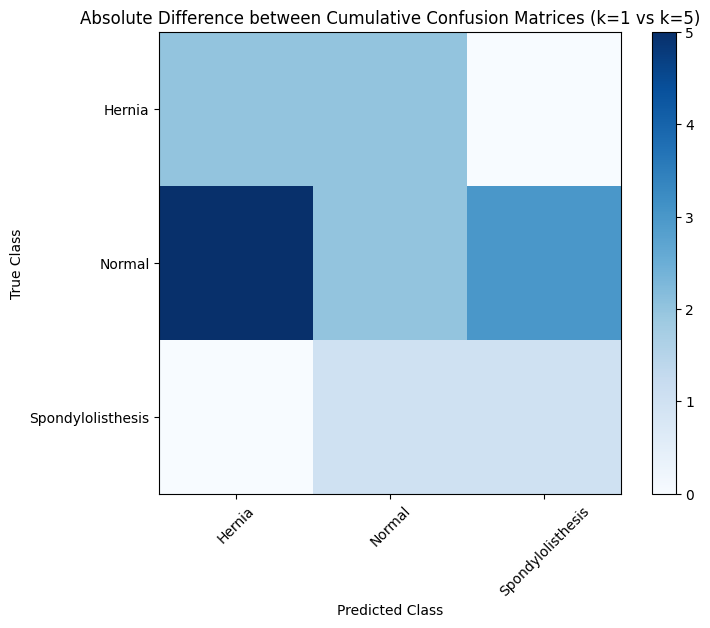

In [6]:
#2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder

# Load ARFF file
data, meta = arff.loadarff('column_diagnosis.arff')

# Extract features and labels from the loaded ARFF data
X = np.array([list(data[i])[:-1] for i in range(len(data))])
y = np.array([data[i][-1].decode('utf-8') for i in range(len(data))])

# Initialize label encoder and encode the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize k-NN classifiers with k=1 and k=5
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

# Get the number of unique classes
num_classes = len(np.unique(y_encoded))

# Initialize StratifiedKFold with 10 folds and shuffling
stratkf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Initialize cumulative confusion matrices
cumulative_cm1 = np.zeros((num_classes, num_classes))
cumulative_cm5 = np.zeros((num_classes, num_classes))

# Perform 10-fold cross-validation
for train_index, test_index in stratkf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Train the classifiers
    knn1.fit(X_train, y_train)
    knn5.fit(X_train, y_train)
    
    # Make predictions
    y_pred1 = knn1.predict(X_test)
    y_pred5 = knn5.predict(X_test)
    
    # Calculate confusion matrices
    cm1 = confusion_matrix(y_test, y_pred1)
    cm5 = confusion_matrix(y_test, y_pred5)
    
    # Update cumulative confusion matrices
    cumulative_cm1 += cm1
    cumulative_cm5 += cm5

# Compute the absolute difference between cumulative confusion matrices
diff_confusion_matrix = np.abs(cumulative_cm1 - cumulative_cm5)

# Plot the difference matrix
plt.figure(figsize=(8, 6))
plt.imshow(diff_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Absolute Difference between Cumulative Confusion Matrices (k=1 vs k=5)')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(np.arange(num_classes), label_encoder.classes_, rotation=45)
plt.yticks(np.arange(num_classes), label_encoder.classes_)
plt.show()

2. Comentário:

Existe um desequilíbrio no True Class para a classe "Normal" pois conseguimos ver que existem bastantes amostras. Isto é visível pela cor azul mais escura. Achamos que ambos os modelos têm uma performance parecida, qual se queira escolher irá depender somente de qual é a finalidade: se é menos importante o erro de encontrar mais pessoas que estejam doentes e na verdade estão normais ou o contrário. Ou seja, se o custo de falsos positivos é alto, então a precisão pode ser uma métrica mais importante a ser considerada.

3.

      Suposição de recursos independentes:
  
Naive Bayes assume que todos os recursos são independentes uns dos outros, dado o rótulo da classe. Em conjuntos de dados do mundo real, especialmente em contextos médicos ou biológicos, as características podem frequentemente ser correlacionadas. Por exemplo, neste conjunto de dados, certas condições como as pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope e pelvic_radius podem estar relacionadas. No entanto, se essas características não forem verdadeiramente independentes, isso viola a suposição de Naive Bayes, levando a previsões tendenciosas.


    Distribuição desequilibrada de classes:
  
Se as classes no conjunto de dados estiverem desequilibradas, o que significa que algumas classes têm significativamente mais instâncias do que outras, isso poderá distorcer os resultados da previsão. Em conjuntos de dados médicos, a distribuição desequilibrada de classes é comum porque algumas condições são mais raras que outras. Previsões tendenciosas podem ser problemáticas, especialmente em diagnósticos médicos onde todas as classes deveriam idealmente ser tratadas com igual importância.


    Sensível a recursos irrelevantes:
    
Naive Bayes considera todas as características igualmente importantes durante a classificação. Se houver recursos irrelevantes no conjunto de dados, eles poderão impactar negativamente a precisão da classificação. Neste conjunto de dados, se existirem características irrelevantes relacionadas com a demografia do paciente, por exemplo, podem não contribuir significativamente para o diagnóstico, mas podem introduzir ruído.